In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import torch
import matplotlib.pyplot as plt
from utils import init_patch, transform, apply_patch

B = 4
im_dim = 224
black_batch = torch.rand(B, im_dim, im_dim, 3)

patch = init_patch(im_dim, 0.1)

p_batch, mask = transform(black_batch, patch)

fig, axes = plt.subplots(2, B, figsize=(15, 6))

axes[0, 0].imshow(patch)
axes[0, 0].set_title('original patch')
axes[0, 0].axis('off')

for i in range(1, B):
    axes[0, i].axis('off')

new_batch = apply_patch(black_batch, p_batch, mask)
for i, im in enumerate(new_batch):
    axes[1, i].imshow(im)

for testing, this just initializes the dataloader, classifier, and patch model

In [16]:
import torch
from train import Patch, CLIPClassifier, patch_loader

loader = patch_loader(split='validation', batch_size=2)
batch = next(iter(loader))

model = CLIPClassifier(deep=1024)
checkpoint = torch.load('checkpoints/imnet_1k.pt', map_location='cpu')
model.load_state_dict(checkpoint['model'])

patch = Patch(model=model, target_label=965, patch_r=0.1)

this gets the model predictions. with the right checkpoint 91=coucal and 268=mexican hairless

In [20]:
logits = patch.forward(batch)
print(torch.argmax(logits, dim=-1))

tensor([ 91, 268])


if you show the images you should see that the classifier seems to do its job correctly

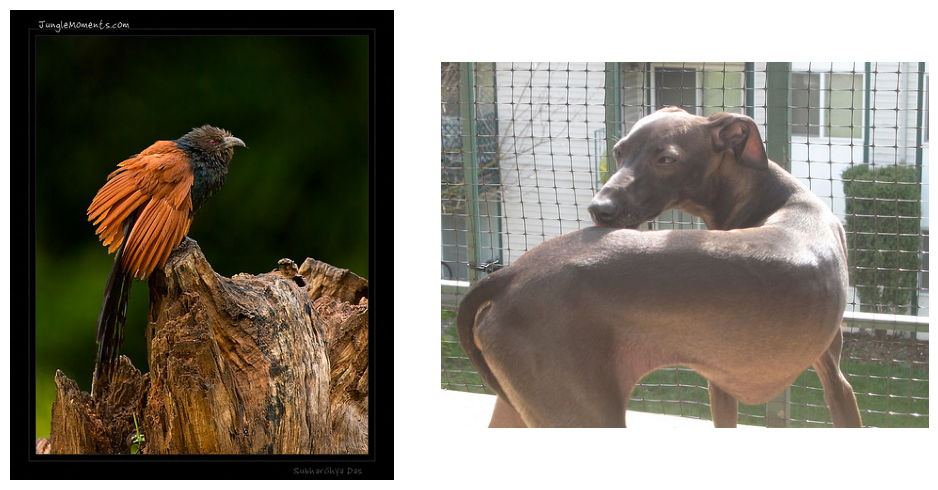

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(batch['pixel_values'][0])
axes[1].imshow(batch['pixel_values'][1])
axes[0].axis('off')
axes[1].axis('off')
plt.tight_layout()
plt.show()

here you can see what the input images look like with the patch applied

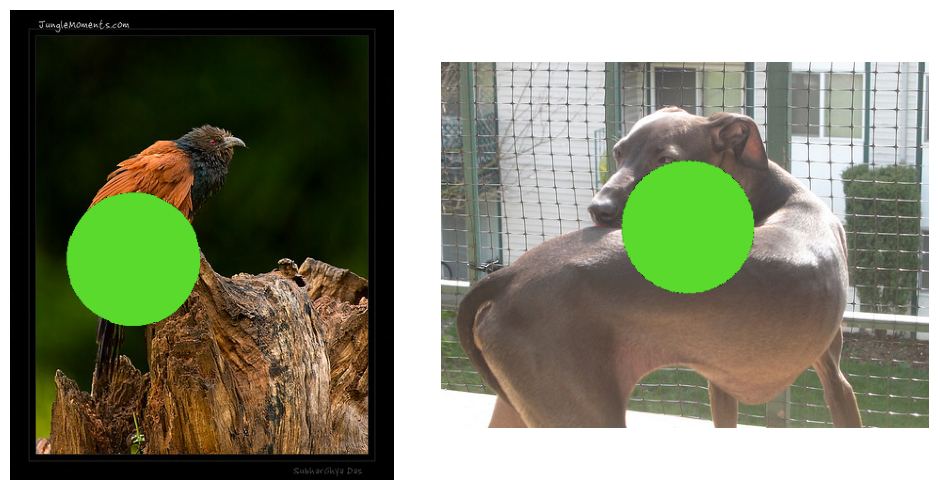

In [24]:
with torch.no_grad():
    patched = [patch.apply_patch(img) for img in batch['pixel_values']]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(patched[0].permute(1, 2, 0))
axes[1].imshow(patched[1].permute(1, 2, 0))
axes[0].axis('off')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## regressions

In [ ]:
!python train.py --config=configs/imnet_local.yml --device=cpu

In [ ]:
!python train.py --patch --config=configs/patch/toy.yml --device=cpu

In [7]:
import torch
import torch.nn as nn

patch = torch.zeros(3, 10)
param = nn.Parameter(patch)

param

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)